In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
df = pd.read_csv('Kalimati_Dataset2.csv')
df.head()

,Commodity,Date,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,35.0,40.0,37.5
1,Tomato Small(Local),2013-06-16,26.0,32.0,29.0
2,Potato Red,2013-06-16,20.0,21.0,20.5
3,Potato White,2013-06-16,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,28.0,30.0,29.0


In [51]:
df.tail()

,Commodity,Date,Minimum,Maximum,Average
305187,Fish Fresh(Rahu),2024-06-12,320.0,330.0,325.0
305188,Fish Fresh(Bachuwa),2024-06-12,240.0,250.0,245.0
305189,Fish Fresh(Chhadi),2024-06-12,240.0,260.0,250.0
305190,Fish Fresh(Mungari),2024-06-12,320.0,330.0,325.0
305191,King Oyster,2024-06-12,280.0,300.0,290.0


In [52]:
df.describe()

,Minimum,Maximum,Average
count,305192.000000,305192.000000,305192.000000
mean,98.248949,110.044559,104.351408
std,93.702358,103.492979,98.639921
min,0.000000,0.000000,0.000000
25%,40.000000,50.000000,45.000000
50%,70.000000,80.000000,75.000000
75%,120.000000,130.000000,125.000000
max,2000.000000,2500.000000,2250.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305192 entries, 0 to 305191
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Commodity  305192 non-null  object 
 1   Date       305192 non-null  object 
 2   Minimum    305192 non-null  float64
 3   Maximum    305192 non-null  float64
 4   Average    305192 non-null  float64
dtypes: float64(3), object(2)
memory usage: 11.6+ MB


# Checking if there is any missing values

In [54]:
df.isnull().any()

Commodity    False
Date         False
Minimum      False
Maximum      False
Average      False
dtype: bool

In [55]:
filtered_df = df[["Commodity","Average","Date"]]
filtered_df

,Commodity,Average,Date
0,Tomato Big(Nepali),37.5,2013-06-16
1,Tomato Small(Local),29.0,2013-06-16
2,Potato Red,20.5,2013-06-16
3,Potato White,15.5,2013-06-16
4,Onion Dry (Indian),29.0,2013-06-16
...,...,...,...
305187,Fish Fresh(Rahu),325.0,2024-06-12
305188,Fish Fresh(Bachuwa),245.0,2024-06-12
305189,Fish Fresh(Chhadi),250.0,2024-06-12
305190,Fish Fresh(Mungari),325.0,2024-06-12


In [56]:
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df.set_index('Date', inplace=True)

C:\Users\Nawap Bastola\AppData\Local\Temp\ipykernel_10964\2980884800.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
tomato_big_df = filtered_df[filtered_df['Commodity']=='Onion Dry (Indian)']
tomato_big_df.describe()

,Average
count,3813.000000
mean,49.506176
std,28.363782
min,17.500000
25%,29.500000
50%,39.000000
75%,62.500000
max,215.000000


In [58]:
filtered_df

,Commodity,Average
Date,,
2013-06-16,Tomato Big(Nepali),37.5
2013-06-16,Tomato Small(Local),29.0
2013-06-16,Potato Red,20.5
2013-06-16,Potato White,15.5
2013-06-16,Onion Dry (Indian),29.0
...,...,...
2024-06-12,Fish Fresh(Rahu),325.0
2024-06-12,Fish Fresh(Bachuwa),245.0
2024-06-12,Fish Fresh(Chhadi),250.0


In [59]:
data_2021 = filtered_df[filtered_df.index.year == 2022]

# Print the filtered rows
print(data_2021[data_2021['Commodity']=='Ginger'])

           Commodity  Average
Date                         
2022-01-01    Ginger    45.00
2022-01-02    Ginger    45.00
2022-01-03    Ginger    40.00
2022-01-04    Ginger    40.00
2022-01-05    Ginger    40.00
...              ...      ...
2022-12-27    Ginger    56.67
2022-12-28    Ginger    56.67
2022-12-29    Ginger    65.00
2022-12-30    Ginger    65.00
2022-12-31    Ginger    65.00

[360 rows x 2 columns]


In [60]:
import plotly.graph_objects as go
import pandas as pd

# Ensure 'Date' column is in datetime format

fig = go.Figure()

# List of commodities to plot
commodities = ['Ginger', 'Cauli Local', 'Cabbage(Local)', 'Potato Red', 'Carrot(Local)']

# Add a trace for each commodity
for commodity in commodities:
    commodity_data = filtered_df[filtered_df['Commodity'] == commodity]
    fig.add_trace(go.Scatter(
        x=commodity_data.index,
        y=commodity_data['Average'],
        mode='lines',
        name=commodity
    ))

# Update layout to ensure each year is displayed on the x-axis
fig.update_layout(
    title='Average Prices of Selected Commodities',
    xaxis_title='Date',
    yaxis_title='Average Price',
    xaxis=dict(
        tickmode='linear',
        dtick='M12',  # Set tick distance to 12 months (1 year)
        tickformat='%Y',
        range=[pd.to_datetime('2013-01-01'), pd.to_datetime('2024-12-31')]
    ),
    height=600,
    width=1000
)

# Show the plot
fig.show()


In [61]:
filtered_df['Commodity'].value_counts().nlargest(20)

Commodity
Cauli Local           3849
Ginger                3849
Chilli Dry            3846
Banana                3841
Coriander Green       3840
Bamboo Shoot          3840
Brd Leaf Mustard      3839
Cabbage(Local)        3837
French Bean(Local)    3836
Potato Red            3834
Chilli Green          3829
Onion Green           3829
Carrot(Local)         3829
Garlic Dry Chinese    3826
Brinjal Long          3821
Mushroom(Kanya)       3821
Lime                  3821
Capsicum              3814
Onion Dry (Indian)    3813
Tamarind              3811
Name: count, dtype: int64

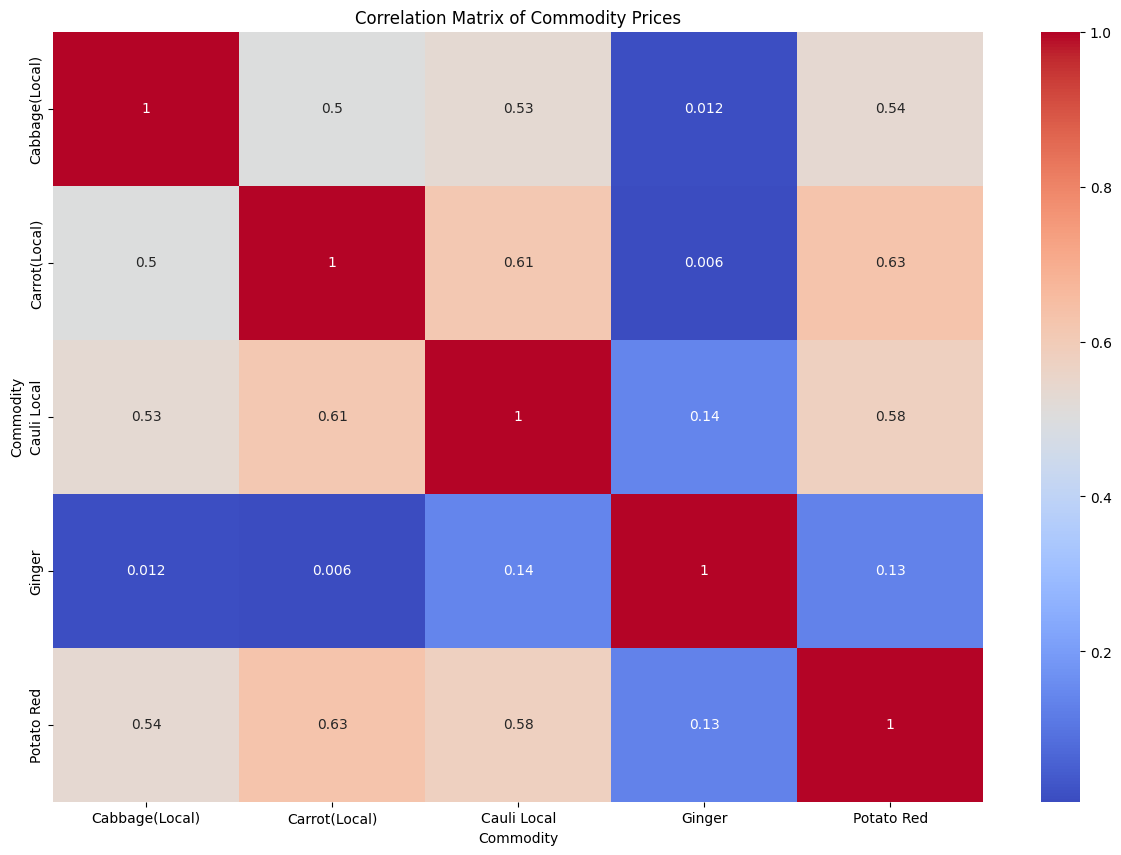

In [62]:
# Filter the DataFrame for the specified commodities
filtered_commodities = filtered_df[filtered_df['Commodity'].isin(['Ginger', 'Cauli Local', 'Cabbage(Local)', 'Potato Red', 'Carrot(Local)'])]

# Create the pivot table
pivot_table = filtered_commodities.pivot_table(index='Date', columns='Commodity', values='Average')

# Calculate the correlation matrix
correlation_matrix = pivot_table.corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Commodity Prices')
plt.show()


In [ ]:
ginger_data = filtered_df[filtered_df['Commodity'] == 'Ginger']
ginger_data.tail()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ginger_data['Average'], label='Average')

plt.title('Ginger Data Over Time')
plt.xlabel('Time')
plt.ylabel('Average')
plt.legend()
plt.show()

In [ ]:
cauli = filtered_df[filtered_df['Commodity'] == 'Cauli Local']
cauli.tail()

In [ ]:
order = (2, 1, 2)
seasonal_order = (1, 1, 1, 180)
model = SARIMAX(cauli['Average'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False, num_threads=-1)
forecast_steps = 120 
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start='2024-06-12', periods=len(forecast), freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Average': forecast})
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(cauli.index, cauli['Average'], color='blue', label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Average'], color='red', label='Forecasted')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Actual and Forecasted Average Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cauli.index, cauli['Average'], color='blue', label='Actual')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Actual and Forecasted Average Prices Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
cauli_viz = cauli[cauli.index.year >= 2023]
plt.figure(figsize=(10, 6))
plt.plot(cauli_viz.index, cauli_viz['Average'], color='blue', label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Average'], color='red', label='Forecasted')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Actual and Forecasted Average Prices Over Time')
plt.legend()
plt.tight_layout()
plt.show()